In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_predict, LeaveOneOut, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn import metrics

# KNN classifier 
from sklearn.neighbors import KNeighborsClassifier

# SVM classifier
from sklearn.svm import SVC
from sklearn import svm

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [2]:
data = pd.read_csv(r"C:\Users\prane\OneDrive\Desktop\Jupyter Notebook\Machine Learning ASE\Project\rideshare_kaggle.csv").sample(75000)
data.drop('id', axis=1, inplace=True)
data

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
596825,1.543314e+09,10,27,11,27-11-2018 10:21,America/New_York,North End,Financial District,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000
227634,1.543772e+09,17,2,12,02-12-2018 17:38,America/New_York,Theatre District,Fenway,Lyft,lyft,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
424562,1.545149e+09,16,18,12,18-12-2018 16:00,America/New_York,Beacon Hill,South Station,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,...,0.0028,1545152400,23.26,1545192000,38.11,1545109200,11.99,1545134400,32.05,1545109200
271495,1.544780e+09,9,14,12,14-12-2018 09:35,America/New_York,Back Bay,Boston University,Lyft,lyft_luxsuv,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
50010,1.544697e+09,10,13,12,13-12-2018 10:25,America/New_York,North Station,Boston University,Lyft,lyft_premier,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175327,1.544962e+09,12,16,12,16-12-2018 12:05,America/New_York,Theatre District,South Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,...,0.1246,1544979600,38.94,1544954400,43.78,1544990400,33.76,1545019200,38.39,1544986800
633204,1.543831e+09,10,3,12,03-12-2018 10:03,America/New_York,Fenway,Beacon Hill,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
317875,1.545054e+09,13,17,12,17-12-2018 13:40,America/New_York,Northeastern University,North Station,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,...,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
51256,1.543462e+09,3,29,11,29-11-2018 03:23,America/New_York,Beacon Hill,Haymarket Square,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


<span style="font-size: 22px; color: green; font-weight: bold">Data Preprocessing</span>

<span style="font-size: 16px; color: green; font-weight: bold">Data Inspection</span>

In [3]:
# To get number of rows and columns in the dataset
num_rows, num_columns = data.shape
num_rows, num_columns

(75000, 56)

In [4]:
# To find the number of missing values in each column
data.isnull().sum()

timestamp                         0
hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          6017
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   0
precipProbability                 0
humidity                          0
windSpeed                         0
windGust                          0
windGustTime                      0
visibility                        0
temperatureHigh             

<span style="font-size: 16px; color: green; font-weight: bold">Handling missing values</span>

In [5]:
# To fill the missing values in the "price" attribute with the mean
mean_price = data['price'].mean()
data['price'].fillna(mean_price, inplace = True)

In [6]:
data.isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

<span style="font-size: 16px; color: green; font-weight: bold">Discretizing the price attribute</span>

In [7]:
price_bins = [float('-inf'), 13, 26, float('inf')]
price_labels = ['low', 'medium', 'high']

In [8]:
data['price_category'] = pd.cut(data['price'], bins=price_bins, labels=price_labels, include_lowest=True).astype(str)

In [9]:
data.shape

(75000, 57)

In [10]:
data['price_category']

596825    medium
227634    medium
424562       low
271495      high
50010     medium
           ...  
175327    medium
633204       low
317875       low
51256        low
565120    medium
Name: price_category, Length: 75000, dtype: object

In [11]:
data.shape

(75000, 57)

<span style="font-size: 16px; color: green; font-weight: bold">Data Visualization</span>

In [12]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon',
 'price_category']

In [13]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns

['timestamp',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

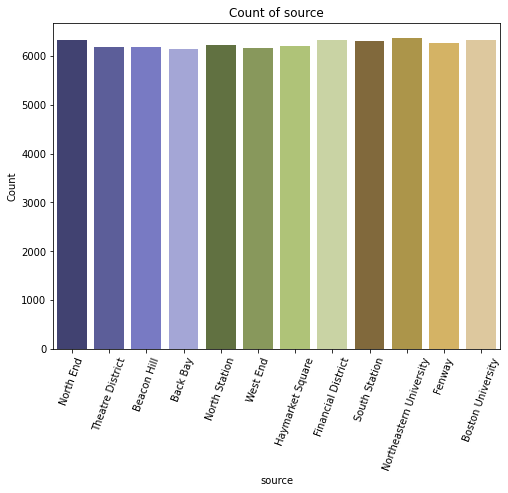

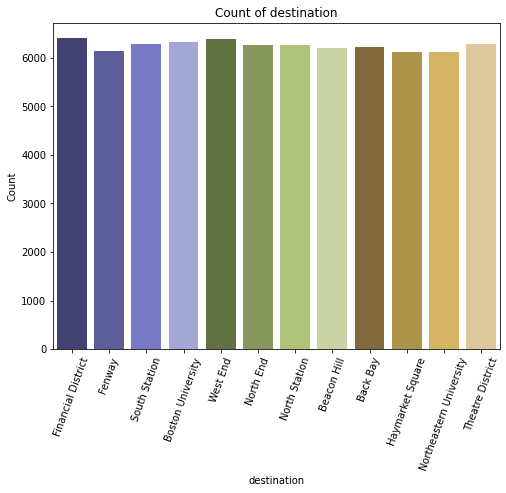

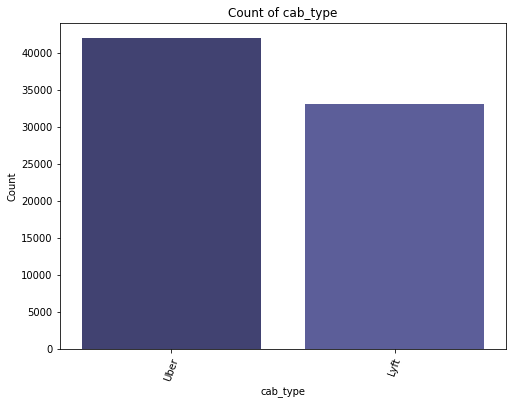

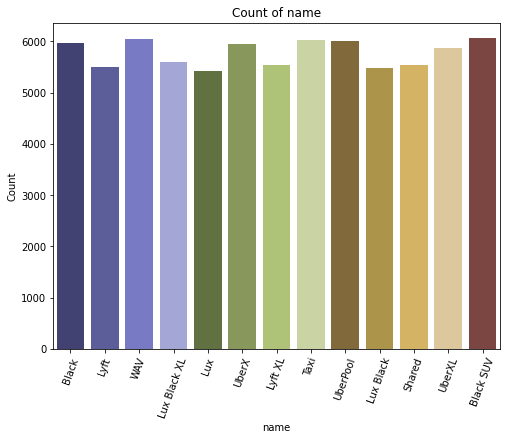

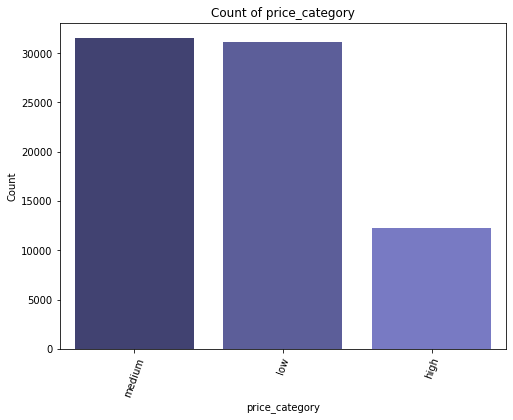

In [16]:
categorical_attributes = ['source', 'destination', 'cab_type', 'name', 'price_category']

for col in categorical_attributes:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    sns.set_palette('tab20b')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=70)
    plt.show()


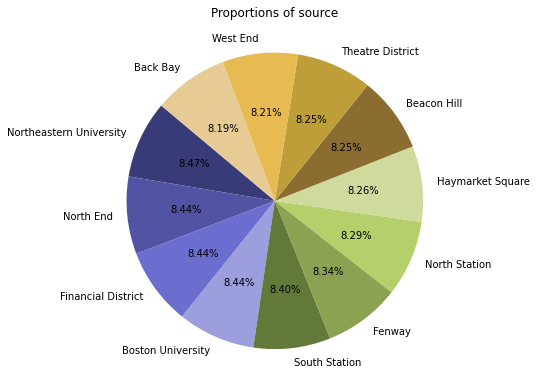

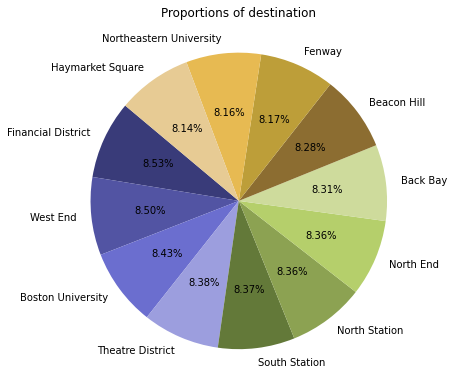

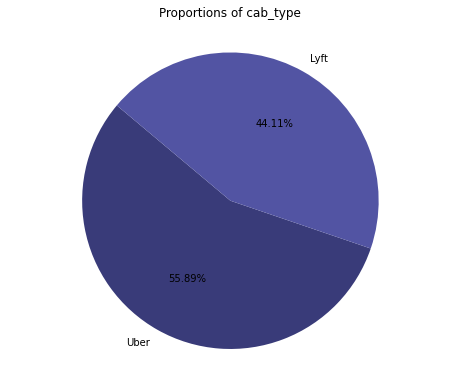

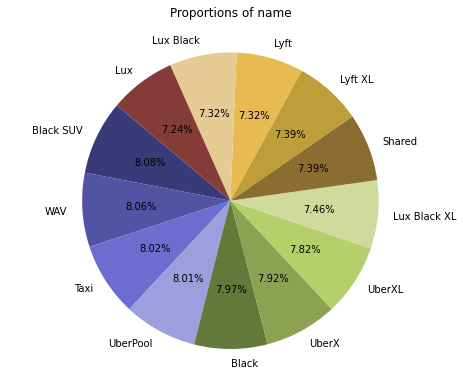

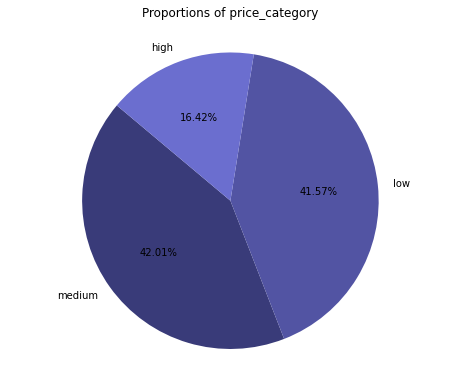

In [17]:
# Pie charts
for col in categorical_attributes:
    # Calculate value counts for each category
    counts = data[col].value_counts()

    plt.figure(figsize=(8, 6))
    plt.title(f'Proportions of {col}\n')
    sns.set_palette('tab20b')
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


In [18]:
# There is some class imbalance...so, we will do under-sampling as we have many instances

<span style="font-size: 16px; color: green; font-weight: bold">Handling the class imbalance</span>

In [19]:
# Checking the class distribution
class_distribution = data['price_category'].value_counts(normalize=True)
print("Current class distribution:\n", class_distribution)

Current class distribution:
 price_category
medium    0.420133
low       0.415707
high      0.164160
Name: proportion, dtype: float64


In [20]:
X = data.drop(columns=['price_category'])  
y = data['price_category']  

In [21]:
# Undersampling to balance the classes
undersampler = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
X, y = undersampler.fit_resample(X, y)

In [22]:
# Check the balanced class distribution
balanced_distribution = pd.Series(y).value_counts(normalize=True)
print("\nBalanced class distribution:\n", balanced_distribution)


Balanced class distribution:
 price_category
high      0.333333
low       0.333333
medium    0.333333
Name: proportion, dtype: float64


In [23]:
# Combining the new X and y into a new dataframe

X_resampled_df = pd.DataFrame(X, columns=X.columns) if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
y_resampled_df = pd.DataFrame(y, columns=[y.name]) if isinstance(y, pd.Series) else pd.DataFrame(y, columns=['label'])

# Concatenate X_resampled and y_resampled along columns (axis=1) to create a new dataset
data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [24]:
#This 'data' is the new dataset after the undersampling
data.shape

(36936, 57)

In [25]:
# Randomizing the rows
data = data.sample(frac=1, random_state=42)  # frac=1 is used to shuffle all the rows

In [26]:
# Resetting index after shuffling
data.reset_index(drop=True, inplace=True)

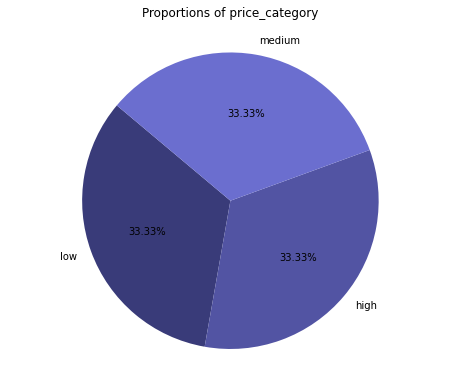

In [27]:
# Pie chart
counts = data['price_category'].value_counts()

plt.figure(figsize=(8, 6))
plt.title(f'Proportions of {col}\n')
sns.set_palette('tab20b')
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


<span style="font-size: 16px; color: green; font-weight: bold">Scaling numeric attributes</span>

In [28]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
numeric_columns = numeric_columns.drop('price_category', errors='ignore')

In [29]:
# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

In [30]:
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [31]:
data

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_category
0,0.238887,0.956522,0.448276,1.0,14-12-2018 22:40,America/New_York,Fenway,North Station,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,...,0.826401,0.405169,0.805217,0.549672,0.848987,0.552408,0.827027,0.538053,0.848315,low
1,0.282588,0.391304,0.586207,1.0,18-12-2018 09:10,America/New_York,Financial District,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,...,1.000000,0.267565,1.000000,0.182266,1.000000,0.011331,1.000000,0.109027,1.000000,low
2,0.035413,0.956522,0.931034,0.0,28-11-2018 22:32,America/New_York,North Station,Northeastern University,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,...,0.130199,0.663269,0.133913,0.373563,0.145488,0.645184,0.131532,0.269735,0.131086,high
3,0.064730,0.217391,0.000000,1.0,01-12-2018 05:52,America/New_York,South Station,Theatre District,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,...,0.262206,0.579541,0.259130,0.460181,0.274401,0.571530,0.261261,0.534513,0.262172,medium
4,0.231251,0.347826,0.448276,1.0,14-12-2018 08:15,America/New_York,Financial District,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,...,0.826401,0.416454,0.805217,0.531199,0.848987,0.563385,0.827027,0.522478,0.848315,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36931,0.009432,0.913043,0.862069,0.0,26-11-2018 21:29,America/New_York,Financial District,Haymarket Square,Lyft,lyft_plus,...,0.045208,0.899891,0.053913,0.536946,0.051565,0.890581,0.077477,0.531681,0.033708,low
36932,0.036446,0.000000,0.965517,0.0,29-11-2018 00:29,America/New_York,North End,Beacon Hill,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,...,0.130199,0.662177,0.133913,0.378079,0.145488,0.650850,0.131532,0.276106,0.131086,high
36933,0.046634,0.826087,0.965517,0.0,29-11-2018 19:43,America/New_York,Beacon Hill,South Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,...,0.175407,0.717874,0.206957,0.455665,0.182320,0.684490,0.207207,0.327788,0.168539,high
36934,0.066408,0.391304,0.000000,1.0,01-12-2018 09:02,America/New_York,North Station,Fenway,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,...,0.262206,0.563524,0.260870,0.464286,0.274401,0.566218,0.263063,0.538053,0.262172,high


<span style="font-size: 16px; color: green; font-weight: bold">Data Encoding</span>

In [32]:
# To seperate the ordinal and nominal columns
ordinal_columns = ['price_category']
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

In [33]:
# One-hot encoding nominal attributes
data_encoded = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

In [34]:
# Label-encoding ordinal attributes
label_encoder = LabelEncoder()
for column in ordinal_columns:
    data_encoded[column] = label_encoder.fit_transform(data[column])

In [35]:
data_encoded

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0.238887,0.956522,0.448276,1.0,0.083799,0.401316,0.0,0.826173,0.223757,0.601149,...,False,False,False,False,False,False,False,False,True,False
1,0.282588,0.391304,0.586207,1.0,0.033520,0.156579,0.0,0.846662,0.070442,0.190551,...,False,False,False,False,False,True,False,False,False,False
2,0.035413,0.956522,0.931034,0.0,0.340782,0.440789,0.0,0.990747,0.707182,0.561733,...,False,False,False,False,False,True,False,False,False,False
3,0.064730,0.217391,0.000000,1.0,0.162011,0.168421,0.0,1.000000,0.584254,0.410076,...,False,False,False,False,False,False,False,False,True,False
4,0.231251,0.347826,0.448276,1.0,0.279330,0.156579,0.0,0.951751,0.479282,0.242495,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36931,0.009432,0.913043,0.862069,0.0,0.094972,0.121053,0.0,0.906147,0.567680,0.689376,...,False,False,False,True,False,True,False,False,False,False
36932,0.036446,0.000000,0.965517,0.0,0.279330,0.189474,0.0,0.895572,0.337017,0.535108,...,False,False,False,False,False,False,False,False,True,False
36933,0.046634,0.826087,0.965517,0.0,0.279330,0.323684,0.0,0.990747,0.707182,0.641608,...,False,False,False,False,False,False,False,True,False,False
36934,0.066408,0.391304,0.000000,1.0,0.312849,0.398684,0.0,0.846662,0.070442,0.338293,...,False,False,False,False,False,False,False,False,True,False


In [36]:
data_encoded['price_category']

0        1
1        1
2        0
3        2
4        0
        ..
36931    1
36932    0
36933    0
36934    0
36935    1
Name: price_category, Length: 36936, dtype: int32

<span style="font-size: 16px; color: green; font-weight: bold">Handling the Outliers</span>

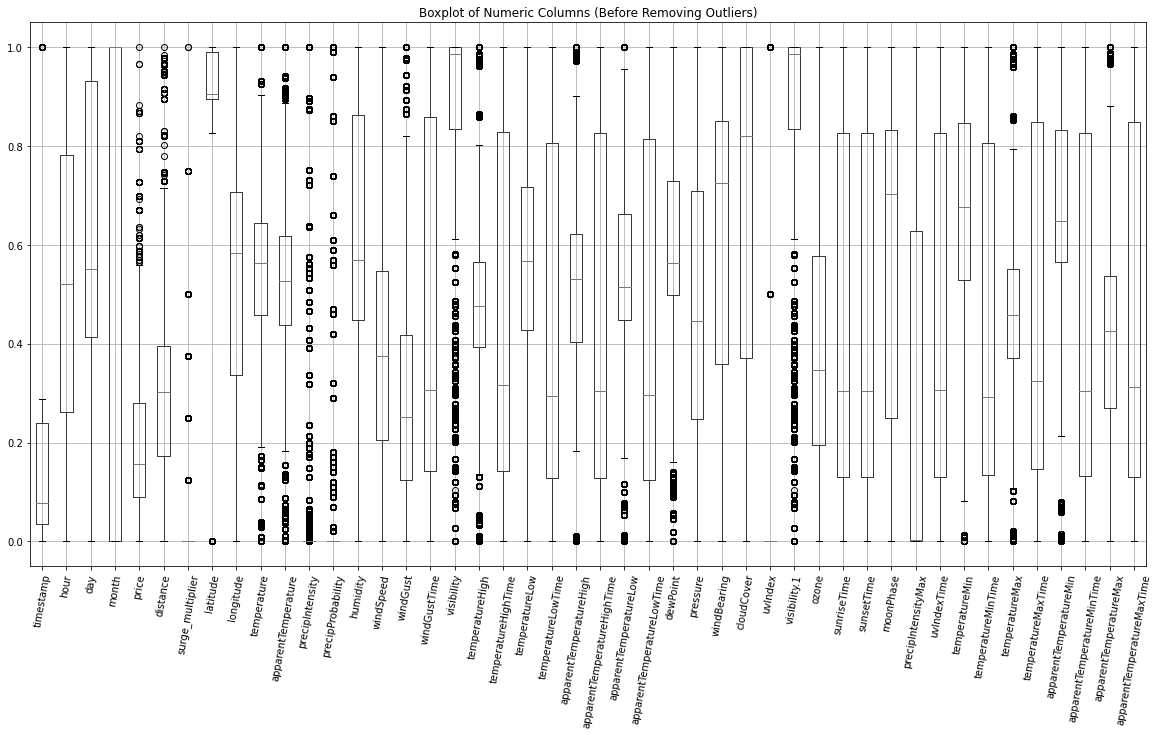

In [37]:
# Boxplots before removing outliers
plt.figure(figsize=(20,10))
data_encoded[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns (Before Removing Outliers)')
plt.xticks(rotation=80)
plt.show()

In [38]:
# Removing outliers using the z-score method
data_encoded_no_outliers = data_encoded[(np.abs(stats.zscore(data_encoded[numeric_columns])) < 3).all(axis=1)]

print("Original Dataset Shape:", data_encoded.shape)
print("Dataset Shape After Removing Outliers:", data_encoded_no_outliers.shape)

Original Dataset Shape: (36936, 5946)
Dataset Shape After Removing Outliers: (32734, 5946)


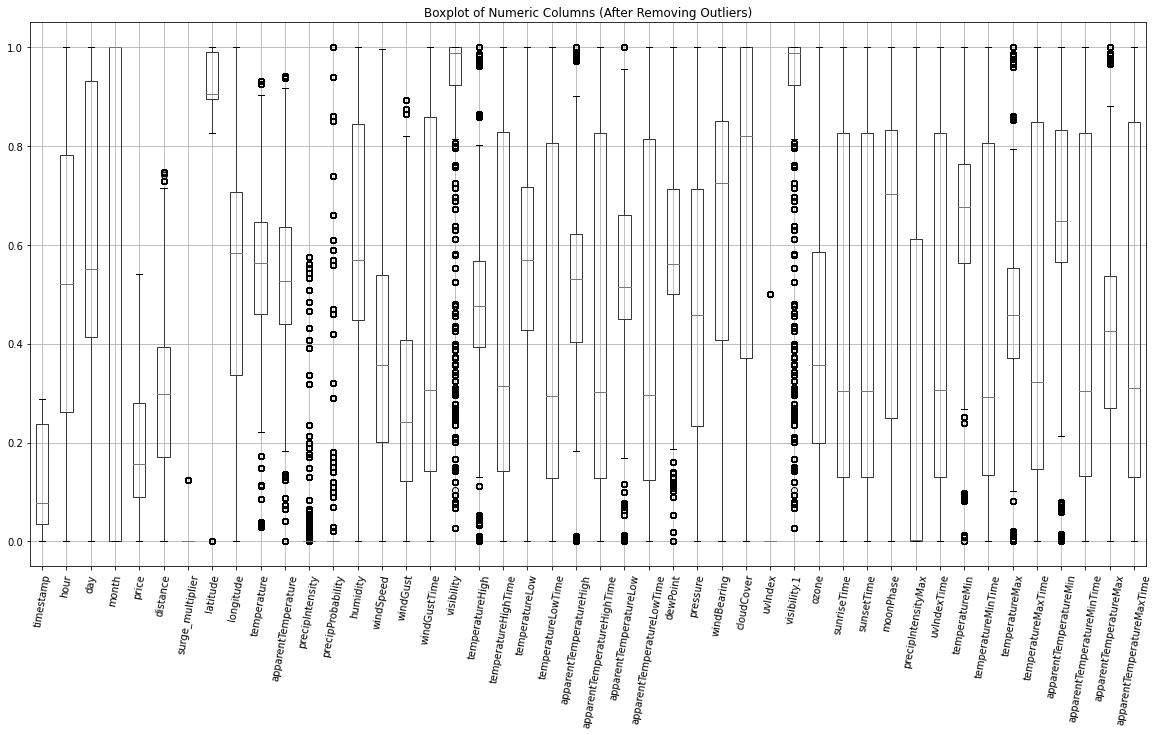

In [39]:
# Boxplots after removing outliers
plt.figure(figsize=(20,10))
data_encoded_no_outliers[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns (After Removing Outliers)')
plt.xticks(rotation=80)
plt.show()

<span style="font-size: 22px; color: green; font-weight: bold">Model Training</span>

<span style="font-size: 16px; color: green; font-weight: bold">Data Split(for classifiers)</span>

In [64]:
X = data_encoded_no_outliers.drop('price_category', axis=1)
y = data_encoded_no_outliers['price_category']

In [65]:
# Splitting the data into training and testing (7:3 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (22913, 5945) (22913,)
Testing set shape: (9821, 5945) (9821,)


<span style="font-size: 16px; color: green; font-weight: bold">Repeated Stratified K Fold Cross Validation</span>

In [93]:
num_folds = 5
num_repeats = 3  

rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=42)

<span style="font-size: 16px; color: green; font-weight: bold">Storing all the values of the evaluation metrics of each models in dictionaries </span>

In [94]:
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

<span style="font-size: 18px; color: green; font-weight: bold">KNN classifier</span>

In [95]:
# Initialize lists to store evaluation metrics for each repetition and fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initializing the confusion matrix for average across folds
average_conf_matrix = np.zeros((3, 3), dtype=int)

In [96]:
# Performing cross-validation for KNN
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred_knn = knn.predict(X_test)

    # Calculating evaluation metrics for the current fold
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    precision_knn, recall_knn, f1_score_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')
    
    accuracy_scores.append(accuracy_knn)
    precision_scores.append(precision_knn)
    recall_scores.append(recall_knn)
    f1_scores.append(f1_score_knn)
    
    # Calculating confusion matrix for the current fold and then add it to the average
    fold_conf_matrix = confusion_matrix(y_test, y_pred_knn)
    average_conf_matrix += fold_conf_matrix

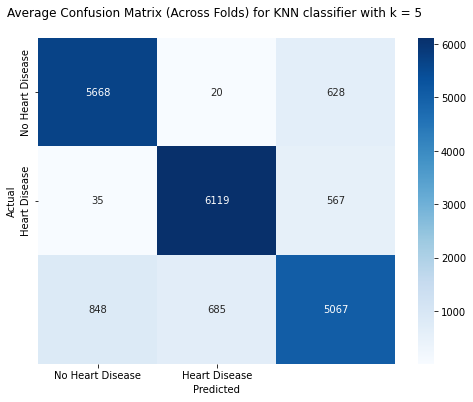

In [97]:
# Calculating the average confusion matrix
average_conf_matrix = (average_conf_matrix / num_folds).astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Average Confusion Matrix (Across Folds) for KNN classifier with k = 5 \n')
plt.show()

In [98]:
# Calculating average evaluation metrics across all folds
avg_accuracy_knn = np.mean(accuracy_scores)
avg_precision_knn = np.mean(precision_scores)
avg_recall_knn = np.mean(recall_scores)
avg_f1_knn = np.mean(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)

Average Accuracy: 0.8582004776760263
Average Precision: 0.8571296784689856
Average Recall: 0.8582004776760263
Average F1 Score: 0.8573324982297653


In [99]:
# Storing the values of the evaluation metrics in the dictionaries
accuracy_dict['KNN'] = avg_accuracy_knn
precision_dict['KNN'] = avg_precision_knn
recall_dict['KNN'] = avg_recall_knn
f1_dict['KNN'] = avg_f1_knn

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values for the number of neighbors
    'p': [1, 2]  # Minkowski distance: 1 for Manhattan, 2 for Euclidean
}

# Initialize variables to store the best scores and their corresponding parameters
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0
best_accuracy_params = {}
best_precision_params = {}
best_recall_params = {}
best_f1_params = {}

# Perform cross-validation with hyperparameter tuning
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create the KNN classifier
    knn = KNeighborsClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(knn, param_grid, cv=rskf, scoring='accuracy')  # Replace 'accuracy' with desired metric
    grid_search.fit(X_train, y_train)

    # Get the best parameters and use them to train the model
    best_params = grid_search.best_params_
    best_knn = KNeighborsClassifier(**best_params)
    best_knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred_knn = best_knn.predict(X_test)

    # Calculating evaluation metrics for the current fold
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    precision_knn, recall_knn, f1_score_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')

    # Update best scores and parameters if a better score is achieved
    if accuracy_knn > best_accuracy:
        best_accuracy = accuracy_knn
        best_accuracy_params = best_params

    if precision_knn > best_precision:
        best_precision = precision_knn
        best_precision_params = best_params

    if recall_knn > best_recall:
        best_recall = recall_knn
        best_recall_params = best_params

    if f1_score_knn > best_f1:
        best_f1 = f1_score_knn
        best_f1_params = best_params

# Display the best scores and their corresponding parameters
print("Best Accuracy:", best_accuracy)
print("Best Accuracy Parameters:", best_accuracy_params)
print("Best Precision:", best_precision)
print("Best Precision Parameters:", best_precision_params)
print("Best Recall:", best_recall)
print("Best Recall Parameters:", best_recall_params)
print("Best F1 Score:", best_f1)
print("Best F1 Score Parameters:", best_f1_params)

<span style="font-size: 18px; color: green; font-weight: bold">Support Vector Machine(SVM)</span>

<span style="font-size: 16px; color: green; font-weight: bold">Linear Kernel</span>

In [36]:
# Initializing the SVM classifier
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear

SVC(kernel='linear', random_state=42)

In [37]:
# Fit the classifier on the training data
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [38]:
# Predict on the test set
y_pred_linear = svm_linear.predict(X_test)

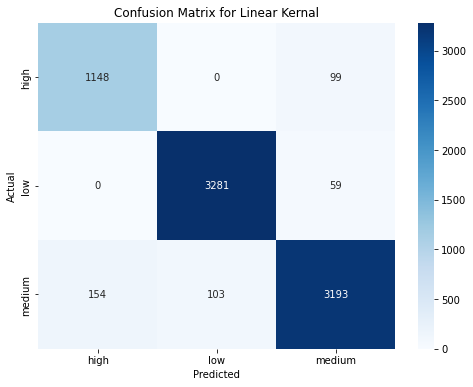

In [39]:
#To print the confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Kernal')
plt.show()

In [40]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_linear))
precision_linear, recall_linear, fscore_linear, _ = precision_recall_fscore_support(y_test, y_pred_linear, average='weighted')
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1 Score:", fscore_linear)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))


Accuracy Score: 0.9483638173447804
Precision: 0.9487590841735358
Recall: 0.9483638173447804
F1 Score: 0.9483935587554835

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1247
           1       0.97      0.98      0.98      3340
           2       0.95      0.93      0.94      3450

    accuracy                           0.95      8037
   macro avg       0.93      0.94      0.94      8037
weighted avg       0.95      0.95      0.95      8037



<span style="font-size: 16px; color: green; font-weight: bold">Polynomial Kernel</span>

In [41]:
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly

SVC(kernel='poly', random_state=42)

In [42]:
# Fit the classifier on the training data
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [43]:
# Predict on the test set
y_pred_poly = svm_poly.predict(X_test)

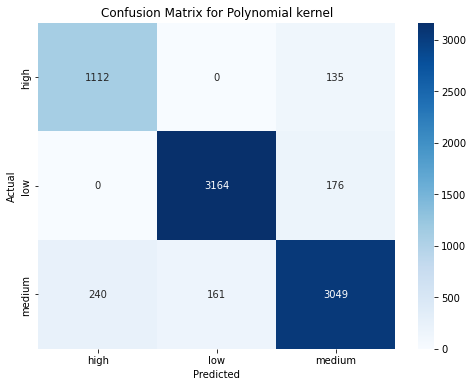

In [44]:
#To print the confusion matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Polynomial kernel')
plt.show()

In [45]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_poly))
precision_poly, recall_poly, fscore_poly, _ = precision_recall_fscore_support(y_test, y_pred_poly, average='weighted')
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1 Score:", fscore_poly)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly))


Accuracy Score: 0.9114097299987558
Precision: 0.9126020132290789
Recall: 0.9114097299987558
F1 Score: 0.9117196669450446

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1247
           1       0.95      0.95      0.95      3340
           2       0.91      0.88      0.90      3450

    accuracy                           0.91      8037
   macro avg       0.89      0.91      0.90      8037
weighted avg       0.91      0.91      0.91      8037



<span style="font-size: 16px; color: green; font-weight: bold">RBF Kernel</span>

In [46]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf

SVC(random_state=42)

In [47]:
# Fit the classifier on the training data
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [48]:
# Predict on the test set
y_pred_rbf = svm_rbf.predict(X_test)

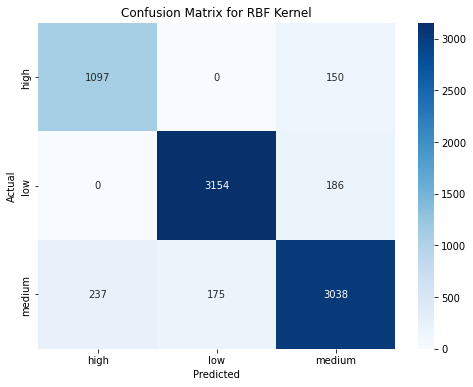

In [49]:
#To print the confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RBF Kernel')
plt.show()

In [50]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rbf))
precision_rbf, recall_rbf, fscore_rbf, _ = precision_recall_fscore_support(y_test, y_pred_rbf, average='weighted')
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1 Score:", fscore_rbf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))


Accuracy Score: 0.9069304466840861
Precision: 0.9078399658182896
Recall: 0.9069304466840861
F1 Score: 0.9071866930655083

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1247
           1       0.95      0.94      0.95      3340
           2       0.90      0.88      0.89      3450

    accuracy                           0.91      8037
   macro avg       0.89      0.90      0.90      8037
weighted avg       0.91      0.91      0.91      8037



<span style="font-size: 16px; color: green; font-weight: bold">Sigmoid Kernel</span>

In [51]:
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)
svm_sigmoid

SVC(kernel='sigmoid', random_state=42)

In [52]:
# Fit the classifier on the training data
svm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=42)

In [53]:
# Predict on the test set
y_pred_sigmoid = svm_sigmoid.predict(X_test)

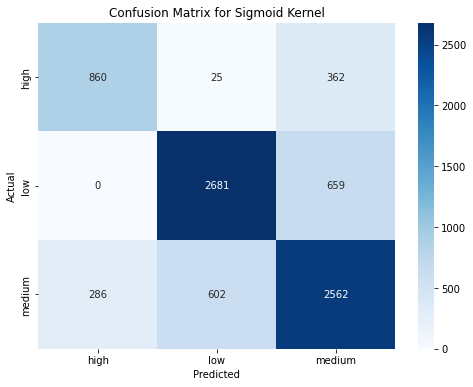

In [54]:
#To print the confusion matrix
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_sigmoid, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sigmoid Kernel')
plt.show()

In [55]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_sigmoid))
precision_sigmoid, recall_sigmoid, fscore_sigmoid, _ = precision_recall_fscore_support(y_test, y_pred_sigmoid, average='weighted')
print("Precision:", precision_sigmoid)
print("Recall:", recall_sigmoid)
print("F1 Score:", fscore_sigmoid)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_sigmoid))


Accuracy Score: 0.7593629463730247
Precision: 0.760187634255026
Recall: 0.7593629463730247
F1 Score: 0.7594566223121451

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1247
           1       0.81      0.80      0.81      3340
           2       0.72      0.74      0.73      3450

    accuracy                           0.76      8037
   macro avg       0.76      0.74      0.75      8037
weighted avg       0.76      0.76      0.76      8037



<span style="font-size: 18px; color: green; font-weight: bold">Naive Bayes</span>

<span style="font-size: 16px; color: green; font-weight: bold">Gaussian Naive Bayes (GNB)</span>

In [67]:
# Initializing Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [68]:
# Fit the classifier on the training data
gnb.fit(X_train, y_train)

GaussianNB()

In [69]:
# Predict on the test data
y_pred_gnb = gnb.predict(X_test)

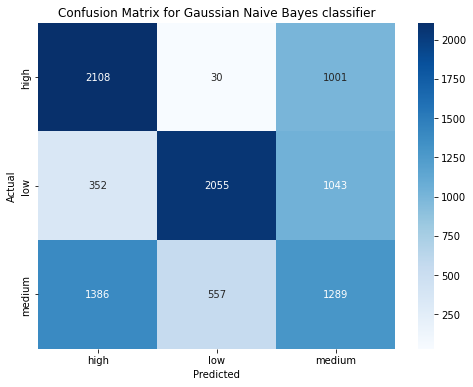

In [70]:
# To print the confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes classifier')
plt.show()

In [71]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_gnb))
precision_gnb, recall_gnb, fscore_gnb, _ = precision_recall_fscore_support(y_test, y_pred_gnb, average='weighted')
print("Precision:", precision_gnb)
print("Recall:", recall_gnb)
print("F1 Score:", fscore_gnb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))


Accuracy Score: 0.5551369514306079
Precision: 0.5756959331078564
Recall: 0.5551369514306079
F1 Score: 0.5591451741159884

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60      3139
           1       0.78      0.60      0.67      3450
           2       0.39      0.40      0.39      3232

    accuracy                           0.56      9821
   macro avg       0.57      0.56      0.56      9821
weighted avg       0.58      0.56      0.56      9821



<span style="font-size: 16px; color: green; font-weight: bold">Multinomial Naive Bayes (MNB)</span>

In [72]:
# Initializing Multinomial Naive Bayes classifier
mnb = MultinomialNB()

In [73]:
# Fit the classifier on the training data
mnb.fit(X_train, y_train)

MultinomialNB()

In [74]:
# Predict on the test data
y_pred_mnb = mnb.predict(X_test)

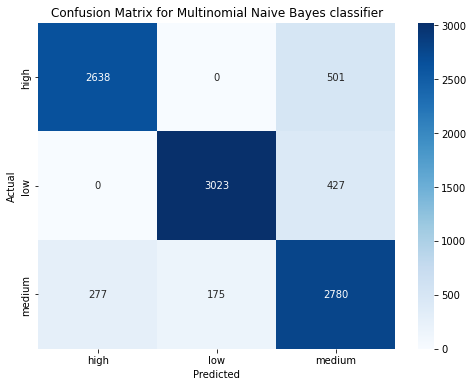

In [75]:
# To print the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naive Bayes classifier')
plt.show()

In [76]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_mnb))
precision_mnb, recall_mnb, fscore_mnb, _ = precision_recall_fscore_support(y_test, y_pred_mnb, average='weighted')
print("Precision:", precision_mnb)
print("Recall:", recall_mnb)
print("F1 Score:", fscore_mnb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb))


Accuracy Score: 0.8594847775175644
Precision: 0.8680432480529792
Recall: 0.8594847775175644
F1 Score: 0.8616762827219725

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      3139
           1       0.95      0.88      0.91      3450
           2       0.75      0.86      0.80      3232

    accuracy                           0.86      9821
   macro avg       0.87      0.86      0.86      9821
weighted avg       0.87      0.86      0.86      9821



<span style="font-size: 16px; color: green; font-weight: bold">Bernoulli Naive Bayes (BNB)</span>

In [77]:
# Initializing Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

In [78]:
# Fit the classifier on the training data
bnb.fit(X_train, y_train)

BernoulliNB()

In [79]:
# Predict on the test data
y_pred_bnb = bnb.predict(X_test)

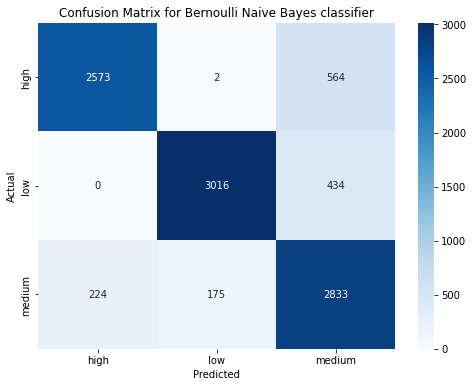

In [80]:
# To print the confusion matrix
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bernoulli Naive Bayes classifier')
plt.show()

In [81]:
# Evaluation metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_bnb))
precision_bnb, recall_bnb, fscore_bnb, _ = precision_recall_fscore_support(y_test, y_pred_bnb, average='weighted')
print("Precision:", precision_bnb)
print("Recall:", recall_bnb)
print("F1 Score:", fscore_bnb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bnb))


Accuracy Score: 0.8575501476428062
Precision: 0.8691994204589932
Recall: 0.8575501476428062
F1 Score: 0.8600612732589364

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      3139
           1       0.94      0.87      0.91      3450
           2       0.74      0.88      0.80      3232

    accuracy                           0.86      9821
   macro avg       0.87      0.86      0.86      9821
weighted avg       0.87      0.86      0.86      9821

